# Task: Exploratory Data Analysis on the Automobile Data Set

In [139]:
# Import necessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Introduction to the dataset 

In [140]:
# Load automobile data and inspect first 5 rows
df = pd.read_csv('automobile.txt')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [141]:
# Print the info on the columns in the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [142]:
# Inspect unique values in categorical variables of interest
df_categorical = df[['make', 
                     'fuel-type', 
                     'aspiration', 
                     'num-of-doors', 
                     'body-style', 
                     'drive-wheels', 
                     'engine-location', 
                     'num-of-cylinders']]

for column in df_categorical:
    print(column, df[column].unique())

make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']
fuel-type ['gas' 'diesel']
aspiration ['std' 'turbo']
num-of-doors ['two' 'four' '?']
body-style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
drive-wheels ['rwd' 'fwd' '4wd']
engine-location ['front' 'rear']
num-of-cylinders ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


## Data Summary:

Each row in the dataset represents one automobile. There is a number of columns describing each automobile, including quantitative variables such as price or engine size and categorical variables such as make and body style.
There are 205 rows in the data and all of the values are non-null. However, there are some values marked as '?' both in the top 5 rows and in the categorical variables unique values. 
Data types found in columns are object, float or int.

# Missing values

In [143]:
# For each column, drop rows with a '?' values
for column in df:
    df = df[df[column]!='?']

## Missing values summary

There are no null values in the dataset, however, the missing values are marked as '?'. I have dropped all rows where the value was equal to '?'.

# Data cleaning

In [144]:
# Drop columns that will not be used in the analysis
df = df.drop(['symboling',
              'normalized-losses',
              'curb-weight',
              'length',
              'width',
              'height',
              'bore',
              'stroke',
              'compression-ratio',
              'engine-type',
              'fuel-system',
              'wheel-base',
              'peak-rpm'],axis=1)

df.columns

Index(['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style',
       'drive-wheels', 'engine-location', 'num-of-cylinders', 'engine-size',
       'horsepower', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [145]:
# Drop any duplicates
df = df.drop_duplicates()

In [146]:
# Make sure all of the quantitavie variables are in the int64 data type
for column in df.iloc[:,8:]:
    
    df[column] = np.int64(df[column])
    
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   make              159 non-null    object
 1   fuel-type         159 non-null    object
 2   aspiration        159 non-null    object
 3   num-of-doors      159 non-null    object
 4   body-style        159 non-null    object
 5   drive-wheels      159 non-null    object
 6   engine-location   159 non-null    object
 7   num-of-cylinders  159 non-null    object
 8   engine-size       159 non-null    int64 
 9   horsepower        159 non-null    int64 
 10  city-mpg          159 non-null    int64 
 11  highway-mpg       159 non-null    int64 
 12  price             159 non-null    int64 
dtypes: int64(5), object(8)
memory usage: 17.4+ KB
None


## Data cleaning summary

I dropped the columns that will not be used in my analysis. I also dropped any potential dubplicate rows. I converted all quatitative variables into am int format. 

# Data Stories and Visualisations

## Engine metrics, price and MPG correlations

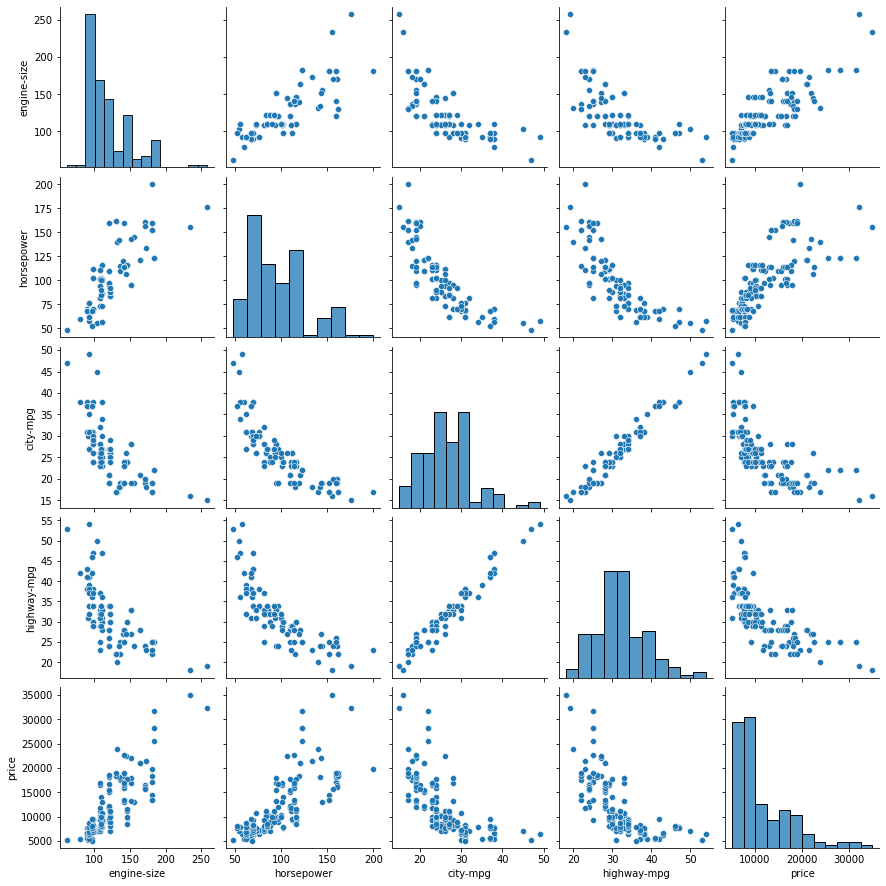

In [147]:
# Create a scatter matrix for all quantitative variables
sns.pairplot(df.iloc[:,8:])
plt.show()


## Findings

There are correlations found on all pairs of plotted variables. 
The higher the engine size, the higher the horse power and price.
On the other hand, the higher the above three metrics are, the miles per galon drop both in the city and highway. 

## Exploring the price by categorical variables

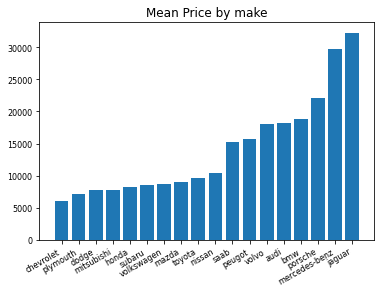

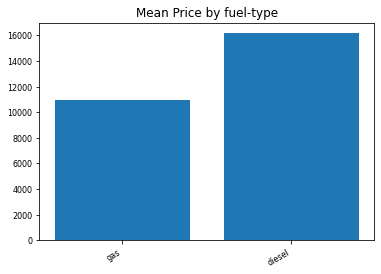

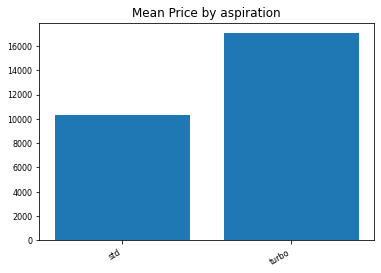

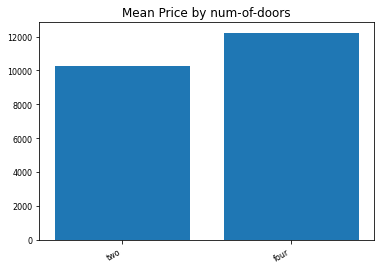

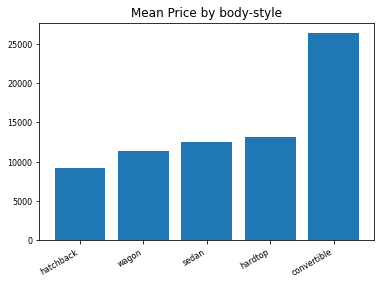

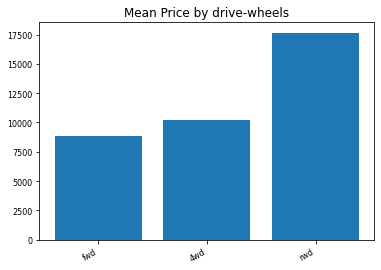

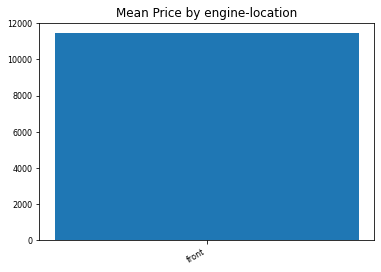

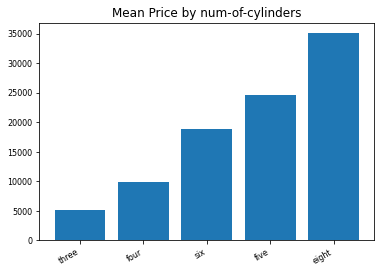

In [148]:
# Plot a bar chart showing mean price by category for each categorical variable
for column in df_categorical:
    price_by_cat = df.groupby(column)['price'].mean().reset_index().sort_values(by='price')
    plt.bar(price_by_cat[column], price_by_cat['price'])
    plt.xticks(rotation=30, ha='right')
    plt.tick_params(axis='both', which='major', labelsize=8)
    plt.title('Mean Price by '+str(column))
    plt.show()


## Findings

On average, most affordable makes are Chevrolet, Dodge and Plymouth, and the most expensive makes are Jaguar, Mercedes-Benz and Porshe.

Gas fuel-type cars and standard aspiration cars tend to be cheaper than diesel cars and turbo aspired cars.

On average, the most affordable body style is hatchback and most expensive are hardtops and convertibles.

Rear-wheel drive cars tend to be significatly more expensive than front-wheel-drive and four-wheel-drive cars.

Cars with engines located in the rear tend to be significantly more expensive than cars with engines in the front.

In terms of the number of cylinders, cars with three cyliders tend to be the cheapest and cars with eight cyliders are the most expensive. Overall, the trend in the data is for price to grow with the number of cylinders.

# Characteristics of most efficient cars

In [149]:
# For a proxy of efficiency I'm going to use City miles-per-galon (MPG) metric
# Get the top 20 (~top 10%) of cars with highest City MPG
top_20_efficiency = df.sort_values('city-mpg', ascending=False).head(20)

# Get the bottom 20 (~bottom 10%) of cars with lowest City MPG
bottom_20_efficiency = df.sort_values('city-mpg').head(20)

# Inspect the most efficient cars
top_20_efficiency

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,num-of-cylinders,engine-size,horsepower,city-mpg,highway-mpg,price
30,honda,gas,std,two,hatchback,fwd,front,four,92,58,49,54,6479
18,chevrolet,gas,std,two,hatchback,fwd,front,three,61,48,47,53,5151
90,nissan,diesel,std,two,sedan,fwd,front,four,103,55,45,50,7099
159,toyota,diesel,std,four,hatchback,fwd,front,four,110,56,38,47,7788
160,toyota,gas,std,four,sedan,fwd,front,four,98,70,38,47,7738
32,honda,gas,std,two,hatchback,fwd,front,four,79,60,38,42,5399
19,chevrolet,gas,std,two,hatchback,fwd,front,four,90,70,38,43,6295
20,chevrolet,gas,std,four,sedan,fwd,front,four,90,70,38,43,6575
182,volkswagen,diesel,std,two,sedan,fwd,front,four,97,52,37,46,7775
118,plymouth,gas,std,two,hatchback,fwd,front,four,90,68,37,41,5572


Just by looking through the data, I can see that the almost all most efficient cars have standard aspiration and four cylinders. They are either hatchback or sedan style. All of them have a front-wheel-drive and engines located at the front. 

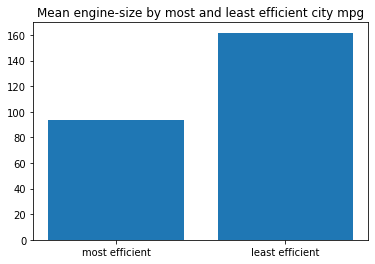

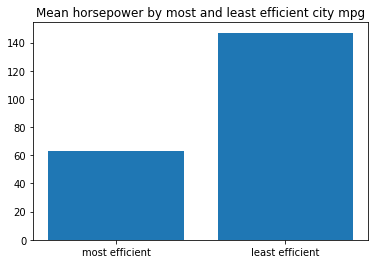

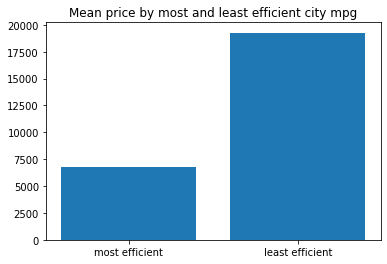

In [150]:
# Plot bar charts for mean engine size, horse power and price between most and least efficient cars
for column in df[['engine-size','horsepower','price']]:
    plt.bar(['most efficient', 'least efficient'],
            [top_20_efficiency[column].mean(), bottom_20_efficiency[column].mean()])
    plt.title('Mean '+str(column)+' by most and least efficient city mpg')
    plt.show()

Most efficient cars generally have smaller engines, less horse power and are significantly less expensive.

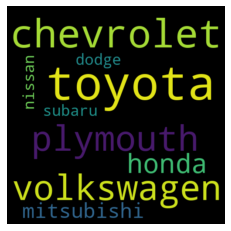

In [151]:
# Look into most efficient makes using a word cloud
# Create a string for makes of most efficient cars
efficient_make_string = top_20_efficiency['make'].to_string()

# Create and display a word cloud of most efficient makes
wordcloud = WordCloud(width=500, height=500, margin=10).generate(efficient_make_string)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.margins(x=0, y=0)
plt.show()

The most common make amongst top efficiency cars is Toyota, followed by Volkswagen and Chevrolet. 

## Findings

Overall, most efficient cars tend to have low engine stats (e.g. horse power or number of cylinders). However, while the engine might be less impressive, efficiency also tends to come with lower prices. 
In terms of the type of cars, most efficient cars are usually sedans or hatchbacks manufactured by brands like Toyota or Volkswagen.  

# The report was written by: Joanna Scharoch